<a href="https://colab.research.google.com/github/H1103/Class-118-Clustering/blob/main/Class_118_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
datatoload = files.upload()

Saving petals_sepals.csv to petals_sepals.csv


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('petals_sepals.csv')

print(df.head())

fig = px.scatter(df, x = "petal_size", y = "sepal_size")
fig.show()

   petal_size  sepal_size
0   11.323484   13.866161
1    9.265842   13.443414
2   14.329944    7.956200
3   11.883902    7.658534
4    9.957722   12.273535


WCSS stands for Within Cluster Sum of Squares.
We are going to choose the center point for the cluster from where all the points in a cluster will be closest, then we will calculate the distance form all the points in a cluster and add them and note the value. Then we will take 2 center points and do the same. Then we will choose the value of K to be the one with the minimum sum of all the distances. Then we will use the elbow method to choose the best value for K. 

In [ ]:
from sklearn.cluster import KMeans

X = df.iloc[:,[0,1]].values
#print(X)

wcss= []
# here the range is taken till 11 because we need 10 cluster points 
# in the classifier we are passing the no of clusters we want to use for the classifier which is i
# then we are using the initializing method which is kmeans++
# then we are using the random_state to tell the classifier to where it shall start from
# inertia method returns wcss for that model
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

pandas provide a unique method to retreive rows form a dataframe, its called Dataframe.iloc[ ]. This iloc method is used when the index label of a dataframe is other than number series or numeric. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



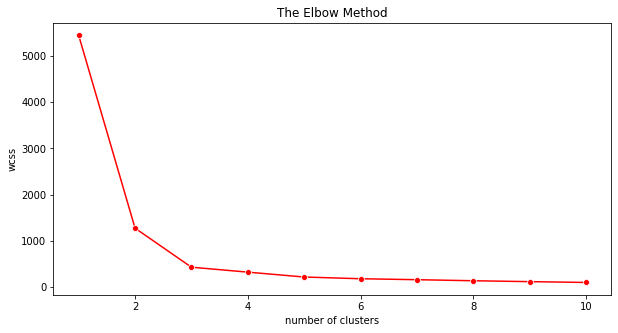

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.lineplot(range(1,11), wcss, marker = 'o', color = 'red')
plt.title("The Elbow Method")
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

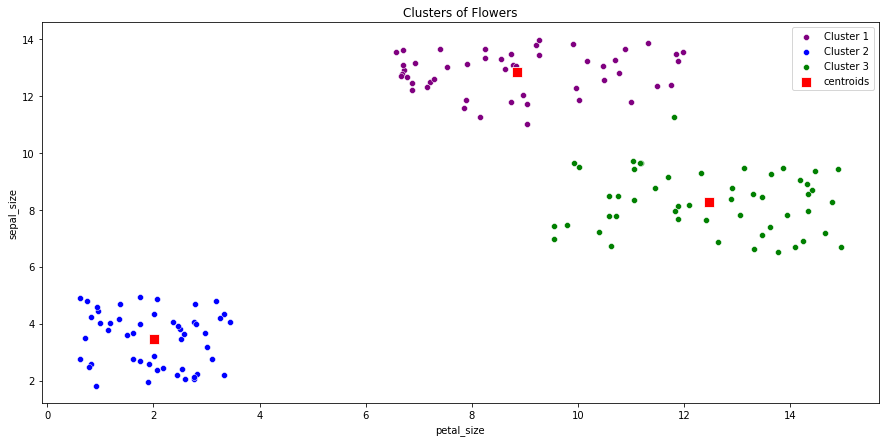

In [ ]:
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize = (15,7))
sns.scatterplot(X[y_kmeans == 0,0], X[y_kmeans == 0,1], color = 'purple', label = 'Cluster 1')
sns.scatterplot(X[y_kmeans == 1,0], X[y_kmeans == 1,1], color = 'blue', label = 'Cluster 2')
sns.scatterplot(X[y_kmeans == 2,0], X[y_kmeans == 2,1], color = 'green', label = 'Cluster 3')
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,color = 'red', label = 'centroids', s = 100, marker = ',')
plt.grid(False)
plt.title("Clusters of Flowers")
plt.xlabel('petal_size')
plt.ylabel('sepal_size')
plt.legend()
plt.show()